In [26]:
# importing python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# Encode categorical variables
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data location
data_path = 'data/Traffic_Violations.csv'

In [3]:
# Load into pandas data frame
df = pd.read_csv(data_path)

In [4]:
# size of data set
df.shape

(1292399, 35)

In [5]:
# View first few rows of the dataset
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [6]:
# View all columns
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [7]:
# information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [8]:
# Removing columns which having null value
df.dropna(inplace=True)

In [9]:
df.shape

(1120327, 35)

In [10]:
# After removing null value now we have aroung 1120327 observation with 35 features
df.isnull().sum()

Date Of Stop               0
Time Of Stop               0
Agency                     0
SubAgency                  0
Description                0
Location                   0
Latitude                   0
Longitude                  0
Accident                   0
Belts                      0
Personal Injury            0
Property Damage            0
Fatal                      0
Commercial License         0
HAZMAT                     0
Commercial Vehicle         0
Alcohol                    0
Work Zone                  0
State                      0
VehicleType                0
Year                       0
Make                       0
Model                      0
Color                      0
Violation Type             0
Charge                     0
Article                    0
Contributed To Accident    0
Race                       0
Gender                     0
Driver City                0
Driver State               0
DL State                   0
Arrest Type                0
Geolocation   

In [11]:
# Feature selection:
# We can drop featurs which doesn't contribute much on prediction such as date of stop, time of stop etc

main_df = df.drop(columns=['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
                           'Location', 'Latitude', 'Longitude',
                           'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
                           'Commercial Vehicle', 'Work Zone', 'State','Accident',
                           'VehicleType', 'Year', 'Make',
                           'Charge', 'Article', 'Contributed To Accident',
                           'Driver State', 'DL State',
                           'Geolocation'])

In [12]:
main_df.columns

Index(['Belts', 'HAZMAT', 'Alcohol', 'Model', 'Color', 'Violation Type',
       'Race', 'Gender', 'Driver City', 'Arrest Type'],
      dtype='object')

In [13]:
main_df.shape

(1120327, 10)

In [14]:
# After drop the columns we have 17 features with 1120327 observation
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120327 entries, 1 to 1291740
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Belts           1120327 non-null  object
 1   HAZMAT          1120327 non-null  object
 2   Alcohol         1120327 non-null  object
 3   Model           1120327 non-null  object
 4   Color           1120327 non-null  object
 5   Violation Type  1120327 non-null  object
 6   Race            1120327 non-null  object
 7   Gender          1120327 non-null  object
 8   Driver City     1120327 non-null  object
 9   Arrest Type     1120327 non-null  object
dtypes: object(10)
memory usage: 94.0+ MB


In [15]:
# Split values into X and y

X = main_df.drop(columns=['Violation Type'])

y = main_df['Violation Type']

In [16]:
# Further divide into subset for model building, here we are split ratio of 75-25
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=246)

In [17]:
X_train.dtypes

Belts          object
HAZMAT         object
Alcohol        object
Model          object
Color          object
Race           object
Gender         object
Driver City    object
Arrest Type    object
dtype: object

In [18]:
# Encode categorical variables
encoder = ce.OrdinalEncoder()

In [19]:
# encode all features in training set.
X_train = encoder.fit_transform(X_train)

# Do the same, but for X_test
X_test = encoder.transform(X_test)

#### Entropy model - no_max_depth

In [23]:
entr_model = tree.DecisionTreeClassifier(criterion='entropy')

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable 
pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy')

In [ ]:
tree.plot_tree(entr_model, class_names = ["Warning", "Citation", "SERO"], feature_names=X_train.columns, filled=True)

In [24]:
# model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

Model Entropy - no max depth
Accuracy: 0.6581358316493027
Balanced accuracy: 0.5055729194344707


In [27]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

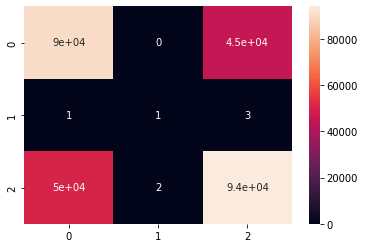

In [28]:
sns.heatmap(cm, annot=True)

##### Gini impurity Model - No Max depth

In [29]:
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini')

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier()

In [ ]:
tree.plot_tree(gini_model, class_names = ["Warning", "Citation", "SERO"],  feature_names=X_train.columns, filled=True)

In [ ]:
# model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

In [31]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

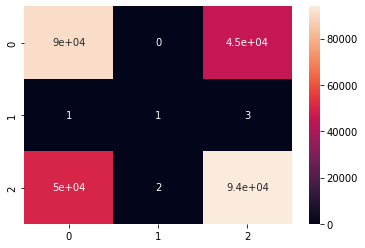

In [32]:
sns.heatmap(cm, annot=True)

Looks like Both gini and entropy model performed moderately with 0.65 accuracy, we many do hyper parameter tuning to improve the results like max-depth etc.